**Assignment on Preprocessing using titanic dataset**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.Load the dataset into python environment**

In [40]:
df=pd.read_csv('/content/titanic_dataset.csv')

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Q2.Make 'PassengerId' as index column**

In [42]:
df=pd.read_csv('/content/titanic_dataset.csv',index_col='PassengerId')

In [43]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Q3.Check the basic details of dataset**

**To check dimension**

In [44]:
df.shape

(891, 11)

**To check basic info**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**To check statistical summary**

In [46]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**To check missing values**

In [47]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Q4.Fill in all the missing values present in all the columns in the dataset.**

In [48]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

For numerical columns,we can replace missing values with mean,median or mode.

In [49]:
df['Age'].fillna(df['Age'].median(),inplace=True)

For categorical columns,we can replace missing values with mode.

In [50]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

In [51]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [52]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**Q4.Check and handle outliers in atleast 3 columns in the dataset**

**Let's make boxplots to visualise outliers in the continuous variables Age and Fare** 


Text(0, 0.5, 'Fare')

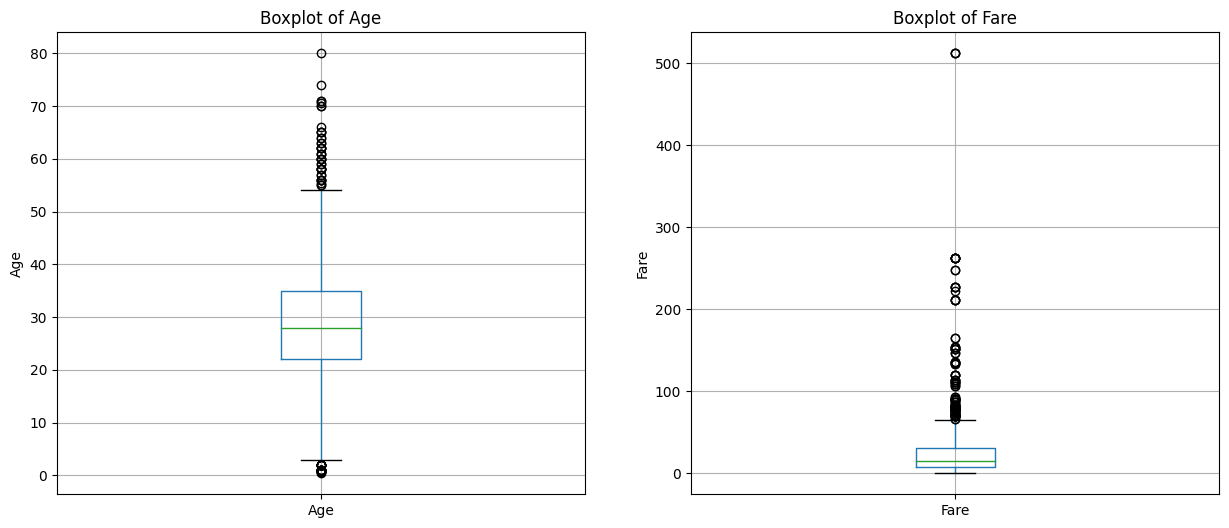

In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = df.boxplot(column='Age')
fig.set_title('Boxplot of Age')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = df.boxplot(column='Fare')
fig.set_title('Boxplot of Fare')
fig.set_ylabel('Fare')

Both Age and Fare contain outliers. Let's find which valuers are the outliers

In [54]:
# first we plot the distributions to find out if they are Gaussian or skewed.

Text(0.5, 0, 'Fare')

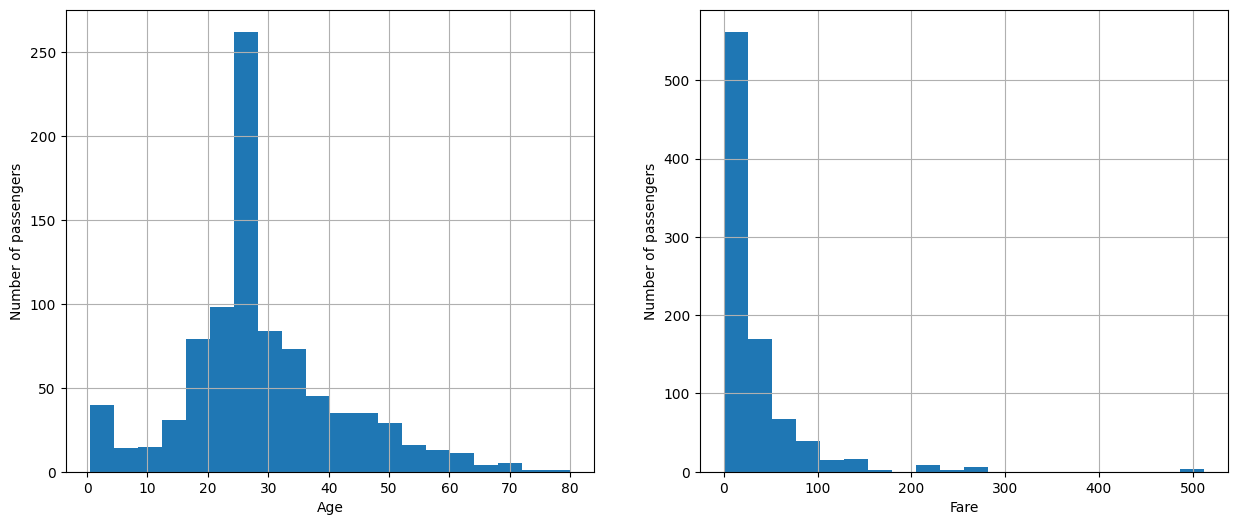

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = df.Age.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = df.Fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

Age is quite Gaussian and Fare is skewed, so I will use the Gaussian assumption for Age, and the interquantile range for Fare.

In [56]:
# find outliers

# Age
Upper_boundary = df.Age.mean() + 3* df.Age.std()
Lower_boundary = df.Age.mean() - 3* df.Age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# Fare
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
Lower_fence = df.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = df.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -9.697507161337114 or > 68.42067214450209
Fare outliers are values < -61.358399999999996 or > 100.2688


Age

For Age variable the outliers lie only on the right of the distribution. Therefore we only need to introduce top-coding.

In [57]:
# view the statistical summary of Age
df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [58]:
# Assuming normality

Upper_boundary = df.Age.mean() + 3* df.Age.std()
Upper_boundary

68.42067214450209

In [59]:
# top-coding the Age variable

df.loc[df.Age>68, 'Age'] = 68
df.loc[df.Age>68, 'Age'] = 68

df.Age.max(),df.Age.max()

(68.0, 68.0)

Fare

The outliers, according to the above plot, lie all at the right side of the distribution. Therefore, in this variable, only extremely high values will affect the performance of our machine learning models, and we need to do therefore top-coding.

In [60]:
# view statistical properties of Fare

df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [61]:
# top coding: upper boundary for outliers according to interquantile proximity rule

IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

Upper_fence = df.Fare.quantile(0.75) + (IQR * 3)

Upper_fence

100.2688

The upper boundary, above which every value is considered an outlier is a cost of 100 dollars for the Fare.

In [62]:
# top-coding: capping the variable Fare at 100
df.loc[df.Fare>100, 'Fare'] = 100
df.loc[df.Fare>100, 'Fare'] = 100
df.Fare.max(), df.Fare.max()

(100.0, 100.0)

**Q6.Do min max scaling on the feature set(Take 'survived' as target)**

In [63]:
from sklearn.preprocessing import MinMaxScaler

Separate the features (input variables) from the target variable ('survived')

In [64]:
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target

Initialize the MinMaxScaler:

In [65]:
scaler = MinMaxScaler()